<h1>Computer Vision MOOC. Chapter I. Basics</h1>
<h2>Structures, transformations, algorithms</h2>

<p>What can be done with Computer Vision?</p>
<p>You can automatically give some interpretation of what you have in the image ......</p>

equations should be here, but they should be written in a special language, etc.
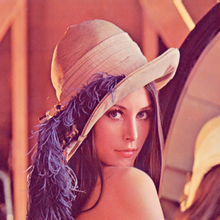

In [1]:
#Some python code here to execute something we have just explained before

Some images should be here as well to explain what we are going to do ...

Before starting, set the correct python scripts in path. Do not forget to set the correct path in the windows variable, and set it where python is.

In [2]:
!echo %path%

c:\program files\python36\lib\site-packages\pywin32_system32;c:\program files\python36\lib\site-packages\pywin32_system32;c:\program files\python36\lib\site-packages\pywin32_system32;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.0\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.0\libnvvp;C:\Program Files\Python36\Scripts\;C:\Program Files\Python36\;C:\Program Files\Python38\Scripts\;C:\Program Files\Python38\;C:\Program Files (x86)\Python38-32\Scripts\;C:\Program Files (x86)\Python38-32\;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2\libnvvp;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Users\Sebastian\AppData\Local\Microsoft\WindowsApps;C:\Users\Sebastian\AppData\Roaming\Python\Python36\Scripts;


Then, upgrade pip install, as we will further need it to install the components

In [3]:
!python -m pip install --upgrade pip --user

Requirement already up-to-date: pip in c:\users\sebastian\appdata\roaming\python\python36\site-packages (20.1.1)


In [4]:
!python -m pip install opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


(220, 220, 3)


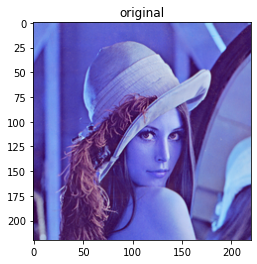

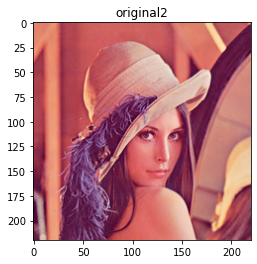

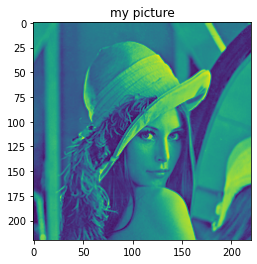

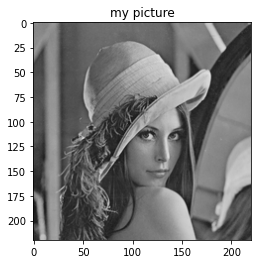

In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('Lenna.png', 1)
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
g = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#for notebook plotting purposes. Otherwise this step is not needed
g2 = cv2.merge([g,g,g])
print(repr(g2.shape))

plt.imshow(img)
plt.title('original')
plt.show()

plt.imshow(img2)
plt.title('original2')
plt.show()

plt.imshow(g)
plt.title('my picture')
plt.show()

plt.imshow(g2)
plt.title('my picture')
plt.show()
# code to do it in your c / c++ project
#cv2.imshow('Original image',img)
#cv2.imshow('Gray image', gray)

In order to remove noise from the image some filters can be applied
First we now add some noise to the original image and then the de-noise is applied to check it is smoothed

image shape (220, 220, 3)
noise shape (220, 220, 3)


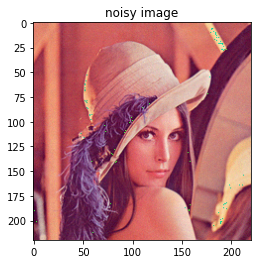

In [23]:
row,col,ch= img2.shape
print('image shape ' + repr(img2.shape))
mean = 0
var = 25
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
#print(repr(gauss))
print('noise shape ' + repr(gauss.shape))
gauss = gauss.reshape(row,col,ch)
gauss8 = gauss.astype(np.uint8)
noisy = img2 + gauss8
#print(repr(noisy))
plt.imshow(noisy)
plt.title('noisy image')
plt.show()

and now, we filter the image with a gaussian noise to remove it.

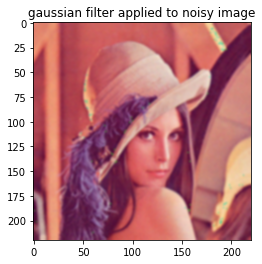

In [24]:
blur = cv2.GaussianBlur(noisy,(5,5),0)
plt.imshow(blur)
plt.title('gaussian filter applied to noisy image')
plt.show()

Gradients are then evaluated to extract borders
The borders are extracted as high variations in some direction.
The gradient module is computed as follows:
\begin{equation*}
G=\sqrt{G_{x}^{2} + G_{y}^{2}}
\end{equation*}
And the angle as follows:
\begin{equation*}
\Theta = \arctan{G_y,G_x}
\end{equation*}

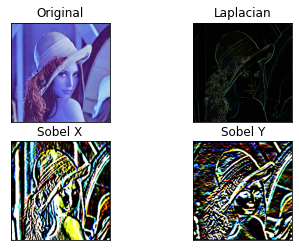

In [26]:
laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

With the gradients computed we can aggregate them as in G and then they can be thresholded in order to better extract the borders.
The threshold can be done using a fixed value or it can be done adaptively.
One way to do it with an adaptive value is using the Canny border detection algorithm which performs gradient computation, filtering and then adaptative thresholding.

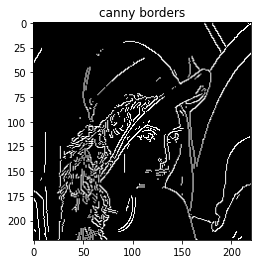

In [9]:
im3 = cv2.Canny(g2, 170, 200)
im4 = cv2.merge([im3,im3,im3])


plt.imshow(im4)
plt.title('canny borders')
plt.show()

The contrast is as simple as scaling the images and the brightness is just adding a value to the whole set of image values.

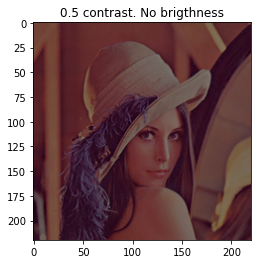

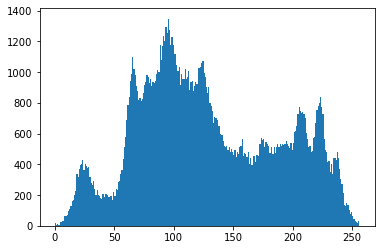

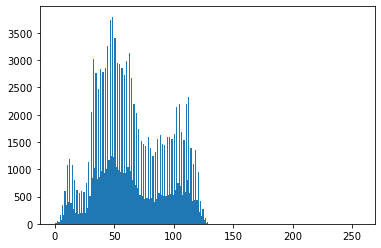

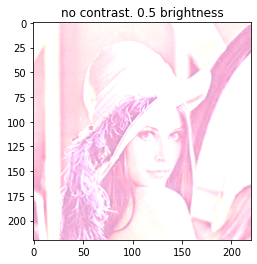

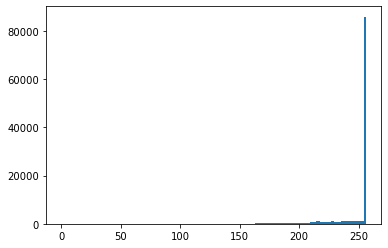

In [10]:
im5 = img2
im6 = img2
#this can be done with opencv functions
#c++ function can be just convertTo
im5 = cv2.convertScaleAbs(im5, -1, 0.5, 0)
im6 = cv2.convertScaleAbs(im6, -1, 1, 150)
#im9 = cv2.cvtColor(im5, cv2.COLOR_RGB2BGR)
#im10 = cv2.cvtColor(im6, cv2.COLOR_RGB2BGR)
plt.imshow(im5)
plt.title('0.5 contrast. No brigthness')
plt.show()
plt.hist(img2.ravel(),256,[0,256]); plt.show()
plt.hist(im5.ravel(), 256,[0,256]);plt.show()
plt.imshow(im6)
plt.title('no contrast. 0.5 brightness')
plt.show()
plt.hist(im6.ravel(),256,[0,256]);plt.show()

It can be seen in the last histogram that the values above 128 are all saturated to 255, which is the maximum possible white of the uint range.
For the case of the contrast manipulation, the image gets darker. it is because the average value of the image (which is the average brightness of the image) is scaled the same factor as the one applied with the brighness.